Taller 3

Andrés Estupiñán Moncada 

Brayan Andrés Castellanos Pinilla 

# Librerias

In [1]:
# Librerias
import pandas as pd
import numpy as np
import pandas_datareader as data
from pandas_datareader import data as pdr
from scipy import stats
from matplotlib import pyplot as plt
import warnings
import statsmodels.api as sm
import seaborn as sns

In [2]:
warnings.filterwarnings("ignore")
!pip install --quiet yfinance
import yfinance as yf
yf.pdr_override()

# Punto 1

In [3]:
# Las acciones escogidas son:
# Procter & Gamble Co. (PG)
# Coca-Cola Co. (KO)
# Johnson & Johnson (JNJ)
# Caterpillar Inc. (CAT)
# 3M Company (MMM)
data = pdr.get_data_yahoo(['PG','KO','JNJ','CAT','MMM'], start='2017-12-1', end='2022-12-31',interval='1Mo')['Adj Close'].dropna() # Precios ajustados de los activos 
data = pd.DataFrame(data)                                                                                                           # Precios ajustados de los activos como data frame

[*********************100%***********************]  5 of 5 completed


In [4]:
# A
# Retornos
retornos= np.log(data/data.shift()).dropna() # Retornos de los activos
retornosm= retornos.mean()                   # Retornos esperados de los activos
# Volatilidad
sigma = retornos.std()                       # Volatilidad de los activos 
# Betas
## Para calcular los betas se utiliza una regresión lineal 
### Buscamos un indice (Benchmark) y calculamos sus retornos 
indice = pdr.get_data_yahoo('^RUA', start='2017-12-1', end='2022-12-31',interval='1Mo')['Adj Close'].dropna() # Se toma un indice Benchmark "que explique el comportamiento de todo el mercado o el mercado del sector que queramos analizar", eneste caso se escogio Russell 3000
r_indice = np.log(indice/indice.shift()).dropna()                                                              # Se toman los retornos del indice Russell 3000
### variables dependientes
Y1 = pd.DataFrame(retornos['PG'].values) 
Y2 = pd.DataFrame(retornos['KO'].values)
Y3 = pd.DataFrame(retornos['JNJ'].values)
Y4 = pd.DataFrame(retornos['CAT'].values) 
Y5 = pd.DataFrame(retornos['MMM'].values)
### variable independiente
X = pd.DataFrame(r_indice.values) 
### Añadimos una contante 
X = sm.add_constant(X)
### Ajustamos el modelo de regresión múltiple para cada activo
modelo1 = sm.OLS(Y1, X).fit()
modelo2 = sm.OLS(Y2, X).fit()
modelo3 = sm.OLS(Y3, X).fit()
modelo4 = sm.OLS(Y4, X).fit()
modelo5 = sm.OLS(Y5, X).fit()
### Sacamos los betas de cada modelo 
beta1 = round(modelo1.params[0],4)
beta2 = round(modelo2.params[0],4)
beta3 = round(modelo3.params[0],4)
beta4 = round(modelo4.params[0],4)
beta5 = round(modelo5.params[0],4)
# Retornos estimados (CAPM)
mr = r_indice.mean()
capm_r1 = round(beta1 *mr,4)
capm_r2 = round(beta2 *mr,4)
capm_r3 = round(beta3 *mr,4)
capm_r4 = round(beta4 *mr,4)
capm_r5 = round(beta5 *mr,4)
# Coeficiente de determinación de cada uno
R_cuadrado1 = round(modelo1.rsquared,4)
R_cuadrado2 = round(modelo2.rsquared,4)
R_cuadrado3 = round(modelo3.rsquared,4)
R_cuadrado4 = round(modelo4.rsquared,4)
R_cuadrado5 = round(modelo5.rsquared,4)
# Cuadro resumen de los datos
## Organizar datos
### Datos de las betas 
B =pd.DataFrame([beta1,beta2,beta3,beta4,beta5])
B.columns = ['Beta']
nombres_fila = ['PG', 'KO', 'JNJ', 'CAT','MMM']
B.index = nombres_fila
# Datos del CAPM
RE =pd.DataFrame([capm_r1,capm_r2,capm_r3,capm_r4,capm_r5])
RE.columns = ['Retornos estimados']
RE.index = nombres_fila
### Datos de coeficiente de determinación 
R =pd.DataFrame([R_cuadrado1,R_cuadrado2,R_cuadrado3,R_cuadrado4,R_cuadrado5])
R.columns = ['R_cuadrado']
R.index = nombres_fila
### Cuadro resumen 
crd = pd.concat([retornosm,sigma,B,RE,R],axis=1)
crd.columns = ['Retorno esperado','Volatilidad','Beta','Retorno estimado','R_cuadrado']
crd

[*********************100%***********************]  1 of 1 completed


,Retorno esperado,Volatilidad,Beta,Retorno estimado,R_cuadrado
CAT,0.009042,0.090186,1.0528,0.0059,0.4251
JNJ,0.006112,0.051181,0.4997,0.0028,0.2973
KO,0.008096,0.057042,0.5746,0.0032,0.3165
MMM,-0.008428,0.069501,0.9300,0.0052,0.5585
PG,0.010611,0.050212,0.3704,0.0021,0.1697


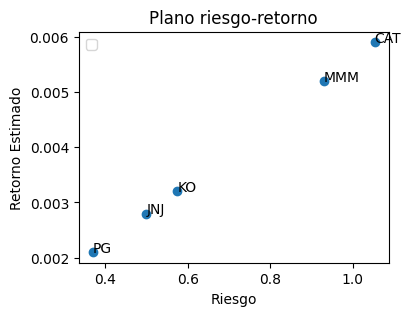

In [5]:
# B
# Grafico de dispersión 
plt.figure(figsize = (4, 3))
x = B['Beta'] # Betas
y = RE['Retornos estimados'] # Retornos esperados

plt.scatter(x, y)

# Agregar etiquetas a cada punto
for i, txt in enumerate(B.index):
    plt.annotate(txt, (x[i], y[i]))

plt.xlabel('Riesgo')
plt.ylabel('Retorno Estimado')
plt.title('Plano riesgo-retorno')
plt.legend()
plt.show()

c. Bono por usar el modelo Fama-French

In [6]:
ff_data = pd.read_csv('F_F.csv', sep=',')
ff_data = ff_data/100
ff_data = ff_data.loc[:, ['Mkt-RF', 'SMB', 'HML']] # selecciona las columnas 'Mkt-RF', 'SMB' y 'HML'
# Creamos las variables necesarias para el modelo Fama-French de tres factores
XF = ff_data
# Variable dependiente
Y1 = pd.DataFrame(retornos['PG'].values)
Y2 = pd.DataFrame(retornos['KO'].values)
Y3 = pd.DataFrame(retornos['JNJ'].values)
Y4 = pd.DataFrame(retornos['CAT'].values) 
Y5 = pd.DataFrame(retornos['MMM'].values)
# Variable independiente
# Agregamos una constante a los datos de entrada para ajustar el intercepto del modelo
XF = sm.add_constant(XF)
# Creamos el modelo de regresión
modelo1F = sm.OLS(Y1, XF).fit()
modelo2F = sm.OLS(Y2, XF).fit()
modelo3F = sm.OLS(Y3, XF).fit()
modelo4F = sm.OLS(Y4, XF).fit()
modelo5F = sm.OLS(Y5, XF).fit()
### Sacamos los betas de cada modelo 
beta11F = round(modelo1F.params['Mkt-RF'],4)
beta12F = round(modelo1F.params['SMB'],4)
beta13F = round(modelo1F.params['HML'],4)

beta21F = round(modelo2F.params['Mkt-RF'],4)
beta22F = round(modelo2F.params['SMB'],4)
beta23F = round(modelo2F.params['HML'],4)

beta31F = round(modelo3F.params['Mkt-RF'],4)
beta32F = round(modelo3F.params['SMB'],4)
beta33F = round(modelo3F.params['HML'],4)

beta41F = round(modelo4F.params['Mkt-RF'],4)
beta42F = round(modelo4F.params['SMB'],4)
beta43F = round(modelo4F.params['HML'],4)

beta51F = round(modelo5F.params['Mkt-RF'],4)
beta52F = round(modelo5F.params['SMB'],4)
beta53F = round(modelo5F.params['HML'],4)
# Retornos estimados (CAPM)
mr = r_indice.mean()
capm_r1F = round(beta11F *mr + beta12F *mr + beta13F *mr,4)
capm_r2F = round(beta21F *mr + beta22F *mr + beta23F *mr,4)
capm_r3F = round(beta31F *mr + beta32F *mr + beta33F *mr,4)
capm_r4F = round(beta41F *mr + beta42F *mr + beta43F *mr,4)
capm_r5F = round(beta51F *mr + beta52F *mr + beta53F *mr,4)
# Coeficiente de determinación de cada uno
R_cuadrado1F = round(modelo1F.rsquared,4)
R_cuadrado2F = round(modelo2F.rsquared,4)
R_cuadrado3F = round(modelo3F.rsquared,4)
R_cuadrado4F = round(modelo4F.rsquared,4)
R_cuadrado5F = round(modelo5F.rsquared,4)
# Cuadro resumen de los datos
## Organizar datos
### Datos de las betas 
BF =pd.DataFrame([[beta11F,beta12F,beta13F],[beta21F,beta22F,beta23F],[beta31F,beta32F,beta33F],[beta41F,beta42F,beta43F],[beta51F,beta52F,beta53F]])
BF.columns = ['Beta de Mkt-RF','Beta de SMB','Beta de HML']
nombres_fila = ['PG', 'KO', 'JNJ', 'CAT','MMM']
BF.index = nombres_fila
# Datos del CAPM
REF =pd.DataFrame([capm_r1F,capm_r2F,capm_r3F,capm_r4F,capm_r5F])
REF.columns = ['Retornos estimados']
REF.index = nombres_fila
### Datos de coeficiente de determinación 
RF =pd.DataFrame([R_cuadrado1F,R_cuadrado2F,R_cuadrado3F,R_cuadrado4F,R_cuadrado5F])
RF.columns = ['R_cuadrado']
RF.index = nombres_fila
### Cuadro resumen 
crdF = pd.concat([retornosm,sigma,BF,REF,RF],axis=1)
crdF.columns = ['Retorno esperado','Volatilidad','Beta de Mkt-RF','Beta de SMB','Beta de HML','Retorno estimado','R_cuadrado']
crdF

,Retorno esperado,Volatilidad,Beta de Mkt-RF,Beta de SMB,Beta de HML,Retorno estimado,R_cuadrado
CAT,0.009042,0.090186,1.0160,0.0191,0.5270,0.0088,0.4816
JNJ,0.006112,0.051181,0.5500,-0.3943,0.0940,0.0014,0.3452
KO,0.008096,0.057042,0.6387,-0.7569,0.3269,0.0012,0.4808
MMM,-0.008428,0.069501,0.9430,-0.1242,0.1962,0.0057,0.5827
PG,0.010611,0.050212,0.4391,-0.6358,0.0662,-0.0007,0.2697


Comparando los resultados de Fama-French con el modelo CAPM se puede sacar las sigientes concluciones: 

1- El modelo Fama-French proporciona más información sobre las betas específicas para los factores de tamaño y valor, en contraposición al modelo CAPM, que solo incluye la beta del mercado en general.

2- En el modelo Fama-French, la beta del mercado (Beta de Mkt-RF) es más baja para todas las empresas en comparación con el modelo CAPM.

3- Se puede observar que en el modelo CAPM, los retornos estimados para todas las empresas son positivos, con valores que van desde 0.0021 para PG hasta 0.0059 para CAT. Por otro lado, en el modelo Fama-French, solo CAT tiene un retorno estimado positivo de 0.0088, mientras que los retornos estimados para las otras empresas son bastante bajos y en algunos casos incluso negativos. 

4- En el cuadro 1, el R cuadrado es más bajo para todas las empresas en comparación con el cuadro 2, lo que sugiere que el modelo Fama-French explica mejor la variabilidad en los retornos esperados de las empresas que el modelo CAPM. 

# Punto 2

In [7]:
# Las acciones escogidas son:
# Procter & Gamble Co. (PG)
# Coca-Cola Co. (KO)
# Johnson & Johnson (JNJ)
# Caterpillar Inc. (CAT)
# 3M Company (MMM)
data = pdr.get_data_yahoo(['PG','KO','JNJ','CAT','MMM'], start='2017-12-1', end='2022-12-31',interval='1Mo')['Adj Close'].dropna() # Precios ajustados de los activos 
data = pd.DataFrame(data)                                                                                                          # Precios ajustados de los activos como data frame
retornos= np.log(data/data.shift()).dropna()                                                                                       # Retornos de los activos        
sigma = retornos.std()                                                                                                             # Volatilidad de los activos                        

[*********************100%***********************]  5 of 5 completed


In [8]:
cov_matrix = retornos.cov()                              # Covarianza 
import cvxpy as cp                                       # Libreria para resolver problemas de optimización convexa
n = 5                                                    # Número de activos
mu = retornosm                                           # Retornos promedio
w = cp.Variable(n)                                       # w --> Va a ser la matriz de pesos 
objetivo = cp.Minimize(cp.quad_form(w, cov_matrix))      # Función obejetivo, 
restricciones = [w@mu == 1, w >= 0]                      # Sin cortos 
prob = cp.Problem(objetivo, restricciones)               # Problema, minimizar la varianza del portafolio
prob.solve()

21.149690085640607

In [9]:
wptsharpe = w.value/w.value.sum()
retornoptsharpe = retornos @ wptsharpe
retornoptsharpem = retornoptsharpe.mean()
sigmaptsharpe = retornoptsharpe.std()
retornoptsharpem, sigmaptsharpe

(0.010302113840912286, 0.04737816401957687)

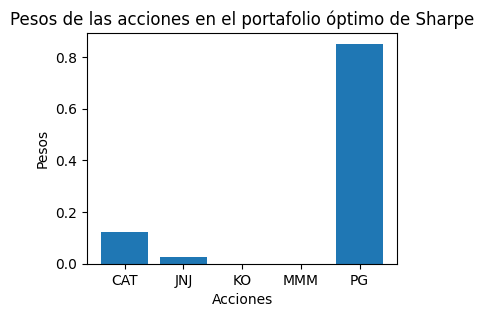

In [10]:
#A
plt.figure(figsize = (4, 3))
plt.bar(range(n),wptsharpe)
plt.xticks(range(n), retornos.columns)
plt.xlabel('Acciones')
plt.ylabel('Pesos')
plt.title('Pesos de las acciones en el portafolio óptimo de Sharpe')
plt.show()

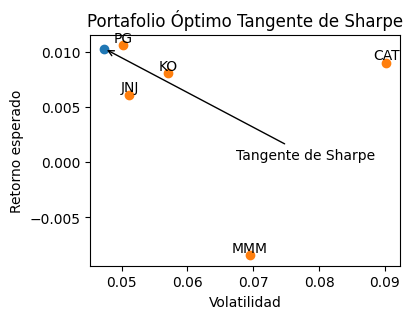

In [11]:
plt.figure(figsize = (4, 3))
plt.scatter(sigmaptsharpe, retornoptsharpem)
plt.scatter(sigma, retornosm)
plt.xlabel('Volatilidad')
plt.ylabel('Retorno esperado')
plt.title('Portafolio Óptimo Tangente de Sharpe')
for i, ticker in enumerate(retornos.columns):
    plt.text(sigma[i], retornosm[i], ticker, ha='center', va='bottom', fontsize=10, color='black')
plt.annotate('Tangente de Sharpe', xy=(sigmaptsharpe, retornoptsharpem), xytext=(sigmaptsharpe+0.02, retornoptsharpem-0.01), 
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.show()

In [12]:
# B
# VaR Paramétrico
from scipy.stats import norm
rp = retornoptsharpe.mean()
sigmap = sigmaptsharpe

alpha1 = 0.05
alpha2 = 0.01 

VaRp1 = rp - norm.ppf(1-alpha1)*sigmap 
VaRp2 = rp - norm.ppf(1-alpha2)*sigmap 
VaRp1,VaRp2

(-0.06762803108499046, -0.09991597730198862)

In [13]:
# C
# VaR Historico
VaRh1 = np.percentile(retornoptsharpe, alpha1)
VaRh2 = np.percentile(retornoptsharpe, alpha2)
VaRh1, VaRh2

(-0.08930470258175331, -0.08940517669766997)

In [14]:
# D
rands_2d = np.random.normal(retornoptsharpem, sigmaptsharpe, size=(10000, n))   # Generar la muestra aleatoria de posibles rendimientos del portafolio
rp_2d = rands_2d @ wptsharpe                                                    # Calcular el rendimiento del portafolio para cada uno de los escenarios de la muestra aleatoria
rp_2dd = np.sort(rp_2d)                                                         # Ordenar los rendimientos del portafolio de menor a mayor

# Calcular el VaR de simulación
VaR_sim1 = rp_2dd[int(10000 * alpha1)] - retornoptsharpem
VaR_sim2 = rp_2dd[int(10000 * alpha2)] - retornoptsharpem

VaR_sim1, VaR_sim2

(-0.068468854141241, -0.09792310546521077)

In [15]:
# E 

# Sí, hay diferencias significativas entre el VaR paramétrico y el VaR de simulación. El VaR de simulación es ligeramente menor que el VaR paramétrico en ambos niveles de confianza.

# Punto 3

In [79]:
#A
# Johnson & Johnson (JNJ)
Act = pdr.get_data_yahoo('JNJ', start='2017-12-1', end='2022-12-31',interval='1Mo')['Adj Close'].dropna() # Precios ajustados de los activos      
# Retornos
r_Act= np.log(Act/Act.shift()).dropna() # Retornos de los activos
r_Act_m= r_Act.mean()                   # Retornos esperados de los activos
# Volatilidad
s_Act = r_Act.std()                     # Volatilidad de los activos                                          

[*********************100%***********************]  1 of 1 completed


Text(0.5, 0, 'Tiempo')

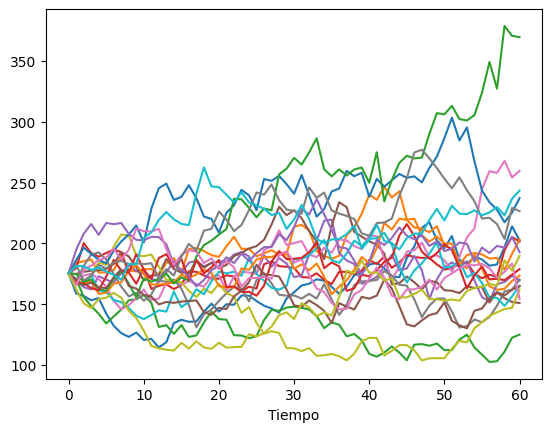

In [80]:
def PathsGBM(S0,mu,sigma,T,NS,M):        # Trayectorias de precios de un activo con un modelo de Movimiento Geométrico Browniano (GBM), 'PathsGBM' es el nombre de la función.
    Z = np.random.normal(0.0,1.0,[NS,M]) # Generar una matriz de números aleatorios normales estándar
    S = np.zeros([NS, M+1])            
    S[:,0] = S0                          # El precio inicial 'S[:,0]' se establece en 'S0' para todas las trayectorias       
    dt = T / M                           # Tamaño del intervalo de tiempo 
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t]) # Solución analitica
    return S

T = 5                             # El período de tiempo durante el cual se generan las trayectorias, en años.
mu = r_Act_m*12                   # La tasa de retorno esperada del activo, anualizada. 
sigma = s_Act*np.sqrt(12)         # La volatilidad del activo, anualizada. 
S0 = Act.iloc[-1]                 # 'S0' Precio inicial del activo 
NS = 10000                        # El número de trayectorias a generar.
M = 60                            # Partición del año en meses (periodicidad) 
St = PathsGBM(S0,mu,sigma,T,NS,M) # Genera la matriz de la trayectoria de precios 

plt.plot(np.transpose(St[:20,:])) 
plt.xlabel("Tiempo")

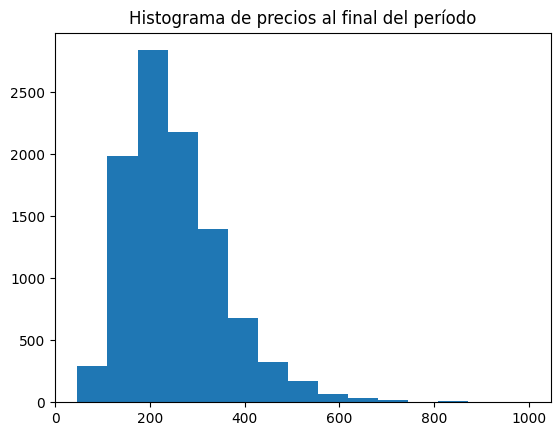

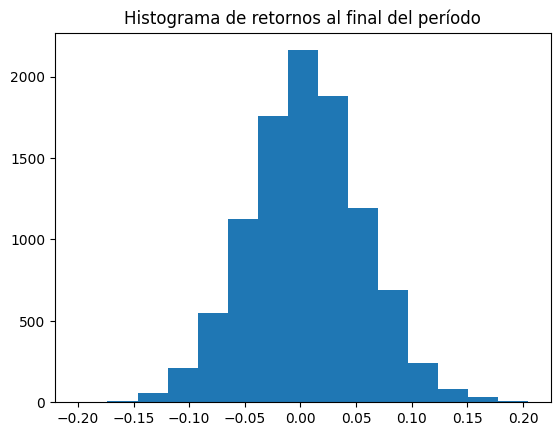

In [18]:
# B
pf = St[:, -1]                                              # Precios al final del período T  

plt.hist(pf, bins='sturges', label='Precios modelados')            # Histograma de precios finales
plt.title("Histograma de precios al final del período")     
plt.show()                                                  # Mostrar histograma 

St_2 = pd.DataFrame(St.T)  
rf_2= np.log(St_2/St_2.shift()).dropna()
rf_2 = rf_2.to_numpy()

rf = rf_2[-1, :]                                            # Retornos al final del período T

plt.hist(rf, bins='sturges', label='Retornos modelados')           # Histograma de retornos finales
plt.title("Histograma de retornos al final del período")
plt.show()

De la forma de los histogramas se puede concluir que:

1- El histograma de los precios tiene una distribución que se asemejan a la distribución gamma.

2-El histograma de los retornos tiene una distribución que se asemejan a la distribución normal.


In [19]:
# C

# Demuestre que el valor del precio simulado de la acción en T converge a ST exp{μ T}.

St[:,-1].mean()  # Solución aproximada por montecarlo 

253.23442173881028

In [20]:
S0 * np.exp(mu * T) # Solución exacta 

253.08916114071906

In [21]:
# D

# Probabilidad de que el precio de la acción sea inferior a S0.

Probabilidad = pd.value_counts(St[:,-1] < S0)[1]/NS
Probabilidad

0.2362

# Punto 4

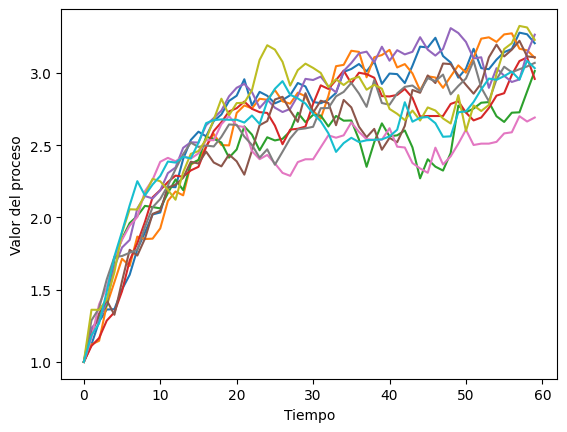

In [22]:
# A
def or_uh(x0, mu, sigma, k, T, dt, NS):

    steps = int(T/dt)
    y = np.zeros((NS, steps))
    for i in range(NS):
        x = np.zeros(steps)
        x[0] = x0
        for j in range(1, steps):
            x[j] = x[j-1] + k*(mu-x[j-1])*dt + sigma*np.sqrt(dt)*np.random.normal()
        y[i] = x
    return y

x0 = 1               # Valor inicial de la simulación.
mu = 3               # Media de largo plazo de la serie.
sigma = 0.3          # Desviación estándar .
k = 1                # Parámetro de reversión
T = 5                # Tiempo Años
dt = T/60            # Tamaño del paso de tiempo.
NS = 10000           # Número de trayectorias a simular.

y = or_uh(x0, mu, sigma, k, T, dt, NS)

plt.plot(np.transpose(y[:10]))
plt.xlabel("Tiempo")
plt.ylabel("Valor del proceso")
plt.show()

In [23]:
# B

# Se puede observar que todas las trayectorias convergen a un valor en el largo plazo. Esto sugiere que el proceso tiene un valor esperado estable en el largo plazo
# También se puede notar que la amplitud de las fluctuaciones del proceso se reduce en el tiempo, lo que sugiere que la varianza del proceso también se reduce en el largo plazo.

In [24]:
# C

# La distribución de probabilidad del proceso Ornstein-Uhlenbeck en cualquier punto en el tiempo t es una Normal con media: μ y varianza: σ^2/(2λ) y se expresa así:
# Xt ~ N(μ, σ^2/(2λ))

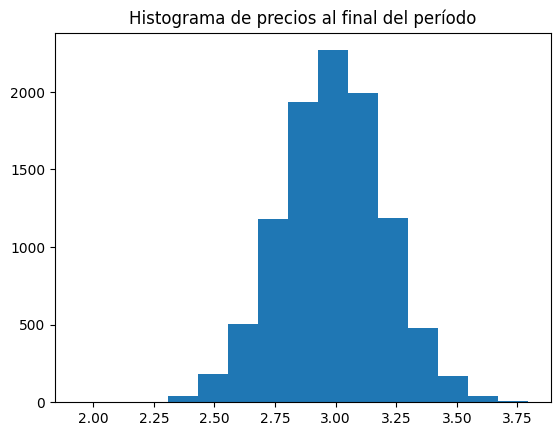

In [25]:
# Graficamente se ve así:
py = y[:, -1]                                              # Precios al final del período T  

plt.hist(py, bins='sturges', label='Precios modelados')    # Histograma de precios finales
plt.title("Histograma de precios al final del período")     
plt.show()                                                  # Mostrar histograma 

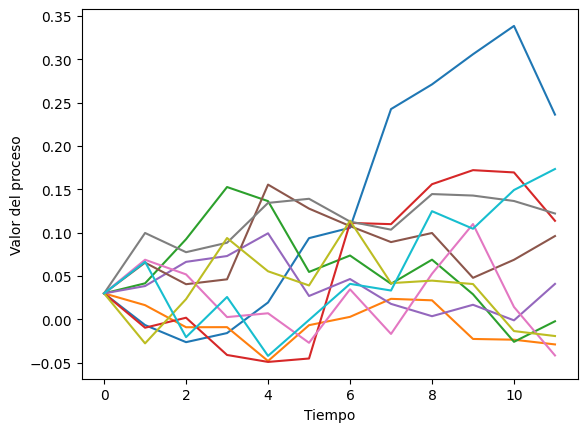

In [26]:
# D
def or_uh(r0, mu, sigma, k, T, dt, NS):

    steps = int(T/dt)
    y = np.zeros((NS, steps))
    for i in range(NS):
        r = np.zeros(steps)
        r[0] = r0
        for j in range(1, steps):
            r[j] = r[j-1] + k*(mu-r[j-1])*dt + sigma*np.sqrt(dt)*np.random.normal()
        y[i] = r 
    return y

r0 = 0.03            # Valor inicial de la simulación.
mu = 0.05            # Media de largo plazo de la serie.
sigma = 0.15         # Desviación estándar .
k = 1                # Parámetro de reversión
T = 1                # Tiempo Años
dt = T/12            # Tamaño del paso de tiempo.
NS = 100             # Número de trayectorias a simular.

y = or_uh(r0, mu, sigma, k, T, dt, NS)

plt.plot(np.transpose(y[:10]))
plt.xlabel("Tiempo")
plt.ylabel("Valor del proceso")
plt.show()

In [27]:
r = np.mean(y[:, -1]) # Calcular la tasa de interés libre de riesgo              
F = 100               # valor que el bono tendrá al momento de su vencimiento
V = F/(1+r)**T        # Valorar el bono cero cupón con vencimiento en T
print("El valor presente del bono es:", V) # Imprimir el valor presente del bono

El valor presente del bono es: 98.17781409185386


# Punto 5

In [103]:
punto_5 = pdr.get_data_yahoo([ "EURUSD=X" ,"^IRX", "GBPUSD=X"], start= "2005-01-01",end="2022-12-31",interval='1Mo')['Adj Close'].dropna() # Precios ajustados de los activos 
punto_5 = pd.DataFrame(punto_5)                                                                                                             # Precios ajustados de los activos como data frame
# Retornos
r_5 = np.log(punto_5/punto_5.shift()).dropna() # Retornos de los activos
r_5m = r_5.mean()                              # Retornos esperados de los activos
# Volatilidad
s_5 = retornos.std()                           # Volatilidad de los activos                                                                                                            

[*********************100%***********************]  3 of 3 completed


<Axes: xlabel='Date'>

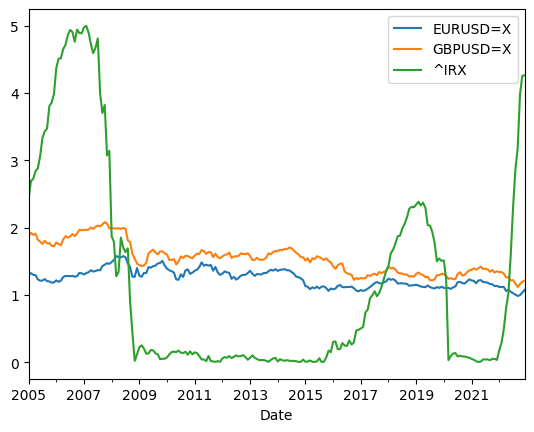

In [98]:
# A
punto_5.plot()

In [106]:
# B

# Pruebas de estacionariedad de Dickey-Fuller (ADF) para punto_5['EURUSD=X']
from statsmodels.tsa.stattools import adfuller
pdf  = adfuller(punto_5['EURUSD=X'])
print('ADF Statistic: %f' % pdf[0])
print('p-value: %f' % pdf[1])
print('Critical Values:')
for key, value in pdf[4].items():
	print('\t%s: %.5f' % (key, value))

ADF Statistic: -1.748285
p-value: 0.406422
Critical Values:
	1%: -3.46114
	5%: -2.87508
	10%: -2.57399


La ADF Statistic (-1.748285) es mayor que los valores críticos (-3.46114, -2.87508, -2.57399) para los tres niveles de significancia (1%, 5%, 10%). Además, el valor p (0.406422) es mayor que el nivel de significancia del 5%. Por lo tanto, no podemos rechazar la hipótesis nula de que la serie de tiempo es no estacionaria.

Los resultados de la prueba de Dickey-Fuller nos permite decir que la serie de tiempo no es estacionaria

In [107]:
# Pruebas de estacionariedad de Dickey-Fuller (ADF) para punto_5['^IRX']
pdf  = adfuller(punto_5['^IRX'])
print('ADF Statistic: %f' % pdf[0])
print('p-value: %f' % pdf[1])
print('Critical Values:')
for key, value in pdf[4].items():
	print('\t%s: %.5f' % (key, value))

ADF Statistic: -2.013092
p-value: 0.280862
Critical Values:
	1%: -3.46188
	5%: -2.87540
	10%: -2.57416


La ADF Statistic (-2.013092) es mayor que los valores críticos (-3.46188, -2.87540, -2.57416) para los tres niveles de significancia (1%, 5%, 10%). Además, el valor p (0.280862) es mayor que el nivel de significancia del 5%. Por lo tanto, no podemos rechazar la hipótesis nula de que la serie de tiempo es no estacionaria.

Los resultados de la prueba de Dickey-Fuller nos permite decir que la serie de tiempo no es estacionaria

In [108]:
# Pruebas de estacionariedad de Dickey-Fuller (ADF) para punto_5['GBPUSD=X']
pdf  = adfuller(punto_5['GBPUSD=X'])
print('ADF Statistic: %f' % pdf[0])
print('p-value: %f' % pdf[1])
print('Critical Values:')
for key, value in pdf[4].items():
	print('\t%s: %.5f' % (key, value))

ADF Statistic: -1.631676
p-value: 0.466614
Critical Values:
	1%: -3.46143
	5%: -2.87521
	10%: -2.57405


La ADF Statistic (-1.631676) es mayor que los valores críticos (-3.46143, -2.87521, -2.57405) para los tres niveles de significancia (1%, 5%, 10%). Además, el valor p (0.466614) es mayor que el nivel de significancia del 5%. Por lo tanto, no podemos rechazar la hipótesis nula de que la serie de tiempo es no estacionaria.

Los resultados de la prueba de Dickey-Fuller nos permite decir que la serie de tiempo no es estacionaria

In [ ]:
# C

# Como ninguna serie es estacionaria entonces modelamos los precios con GMB

Text(0.5, 0, 'Tiempo')

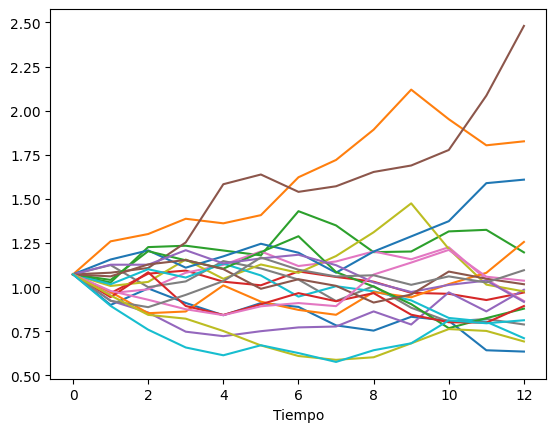

In [133]:
def PathsGBM(S0,mu,sigma,T,NS,M):        # Trayectorias de precios de un activo con un modelo de Movimiento Geométrico Browniano (GBM), 'PathsGBM' es el nombre de la función.
    Z = np.random.normal(0.0,1.0,[NS,M]) # Generar una matriz de números aleatorios normales estándar
    S = np.zeros([NS, M+1])            
    S[:,0] = S1                          # El precio inicial 'S[:,0]' se establece en 'S0' para todas las trayectorias       
    dt = T / M                           # Tamaño del intervalo de tiempo 
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t]) # Solución analitica
    return S

T = 1                             # El período de tiempo durante el cual se generan las trayectorias, en años.
mu = r_5m.iloc[0]*12              # La tasa de retorno esperada del activo, anualizada. 
sigma = s_5.iloc[0]*np.sqrt(12)   # La volatilidad del activo, anualizada. 
S1 = punto_5['EURUSD=X'].iloc[-1] # 'S0' Precio inicial del activo 
NS = 100                          # El número de trayectorias a generar.
M = 12                            # Partición del año en meses (periodicidad) 
S_51 = PathsGBM(S0,mu,sigma,T,NS,M) # Genera la matriz de la trayectoria de precios 

plt.plot(np.transpose(S_51[:20,:])) 
plt.xlabel("Tiempo")

Text(0.5, 0, 'Tiempo')

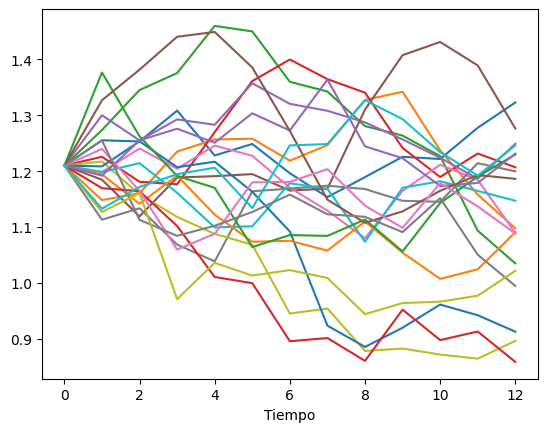

In [134]:
def PathsGBM(S0,mu,sigma,T,NS,M):        # Trayectorias de precios de un activo con un modelo de Movimiento Geométrico Browniano (GBM), 'PathsGBM' es el nombre de la función.
    Z = np.random.normal(0.0,1.0,[NS,M]) # Generar una matriz de números aleatorios normales estándar
    S = np.zeros([NS, M+1])            
    S[:,0] = S1                          # El precio inicial 'S[:,0]' se establece en 'S0' para todas las trayectorias       
    dt = T / M                           # Tamaño del intervalo de tiempo 
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t]) # Solución analitica
    return S

T = 1                             # El período de tiempo durante el cual se generan las trayectorias, en años.
mu = r_5m.iloc[1]*12              # La tasa de retorno esperada del activo, anualizada. 
sigma = s_5.iloc[1]*np.sqrt(12)   # La volatilidad del activo, anualizada. 
S1 = punto_5['GBPUSD=X'].iloc[-1] # 'S0' Precio inicial del activo 
NS = 100                          # El número de trayectorias a generar.
M = 12                            # Partición del año en meses (periodicidad) 
S_52 = PathsGBM(S0,mu,sigma,T,NS,M) # Genera la matriz de la trayectoria de precios 

plt.plot(np.transpose(S_52[:20,:])) 
plt.xlabel("Tiempo")

Text(0.5, 0, 'Tiempo')

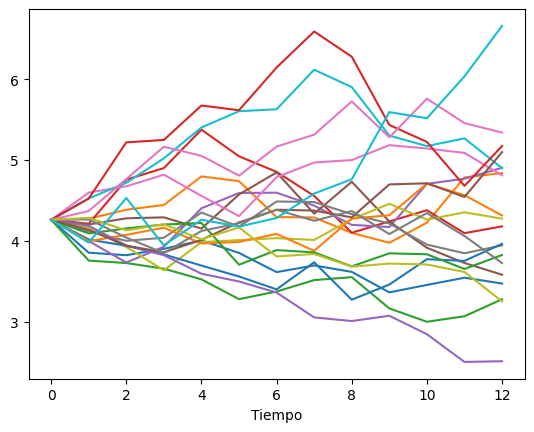

In [135]:
def PathsGBM(S0,mu,sigma,T,NS,M):        # Trayectorias de precios de un activo con un modelo de Movimiento Geométrico Browniano (GBM), 'PathsGBM' es el nombre de la función.
    Z = np.random.normal(0.0,1.0,[NS,M]) # Generar una matriz de números aleatorios normales estándar
    S = np.zeros([NS, M+1])            
    S[:,0] = S1                          # El precio inicial 'S[:,0]' se establece en 'S0' para todas las trayectorias       
    dt = T / M                           # Tamaño del intervalo de tiempo 
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t]) # Solución analitica
    return S

T = 1                             # El período de tiempo durante el cual se generan las trayectorias, en años.
mu = r_5m.iloc[2]*12              # La tasa de retorno esperada del activo, anualizada. 
sigma = s_5.iloc[2]*np.sqrt(12)   # La volatilidad del activo, anualizada. 
S1 = punto_5['^IRX'].iloc[-1] # 'S0' Precio inicial del activo 
NS = 100                          # El número de trayectorias a generar.
M = 12                            # Partición del año en meses (periodicidad) 
S_53 = PathsGBM(S0,mu,sigma,T,NS,M) # Genera la matriz de la trayectoria de precios 

plt.plot(np.transpose(S_53[:20,:])) 
plt.xlabel("Tiempo")

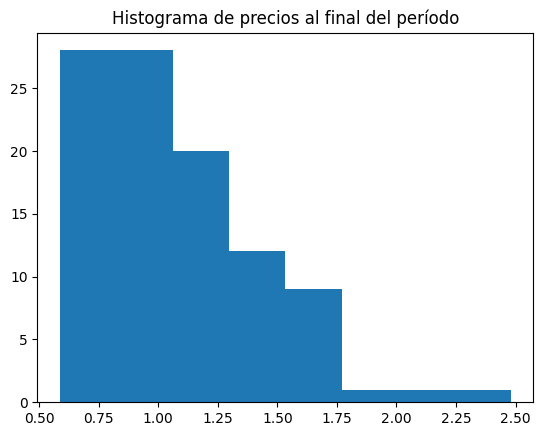

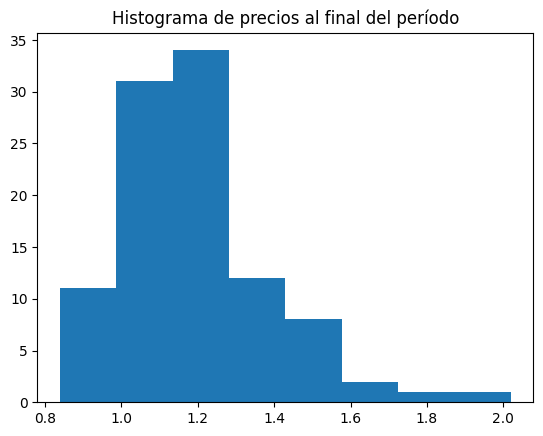

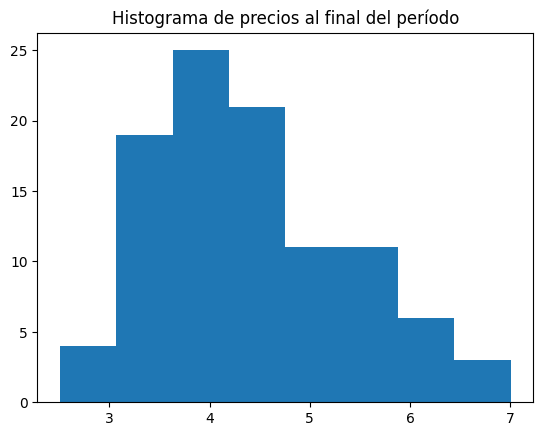

In [136]:
p_51 = S_51[:, -1]                                              # Precios al final del período T  

plt.hist(p_51, bins='sturges', label='Precios modelados')            # Histograma de precios finales
plt.title("Histograma de precios al final del período")     
plt.show()                                                  # Mostrar histograma 

p_52 = S_52[:, -1]                                              # Precios al final del período T  

plt.hist(p_52, bins='sturges', label='Precios modelados')            # Histograma de precios finales
plt.title("Histograma de precios al final del período")     
plt.show()                                                  # Mostrar histograma 

p_53 = S_53[:, -1]                                              # Precios al final del período T  

plt.hist(p_53, bins='sturges', label='Precios modelados')            # Histograma de precios finales
plt.title("Histograma de precios al final del período")     
plt.show()                                                  # Mostrar histograma 

De la forma de los histogramas se puede concluir que:

Los histogramas de los precios tienen una distribución que se asemejan a la distribución gamma.